# Sparks Foundation Task 1: Prediction using Unsupervised ML

Task: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Let's start by importing the necessary libraries.   

In [1]:
#Data Processing
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

First let's read the file.

In [2]:
#Reading the file
iris = pd.read_csv('Iris.csv')

Let's then see what our data looks like.

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris.isnull().values.any()

False

Looks like the dataset is complete, no null value, and every value is relevant to our analysis.

Since there are 3 different types of species, there might just be 3 clusters, assuming each species has different sepal/petal length/width.

To determine the number of clusters, let's use the elbow method. I'll get all the length and width values, and then initialize an empty array for the sum of squared errors, what we need to calculate.

I'll then assume a max of 11 clusters, and use the KMeans function to cluster the data in 'k' groups, minimizing the inertia, the sum-of-squares criterion. Next, I'll append the inertia to the sum_squared_errors list.

I'll then plot sum_squared_errors, and look for a bend in the chart, hence the "Elbow" method, as it looks like a bend in the elbow. I'll categorize this as the point where the dataset no longer decreases by a significant amount.


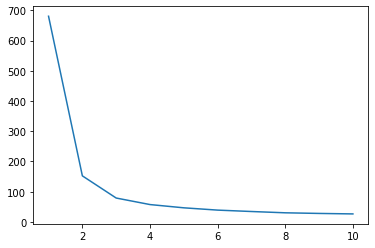

In [7]:
x_points = iris.iloc[:,[1,2,3,4]].values
sum_squared_errors = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k).fit(x_points)
    sum_squared_errors.append(kmeans.inertia_)

plt.plot(range(1,11),sum_squared_errors)

Looks like we have a bend at 3, denoting 3 clusters (as we predicted).

Let's then graph the datasets and identify the 3 clusters.

Text(0.5, 1.0, 'Petal Length vs. Petal Width')

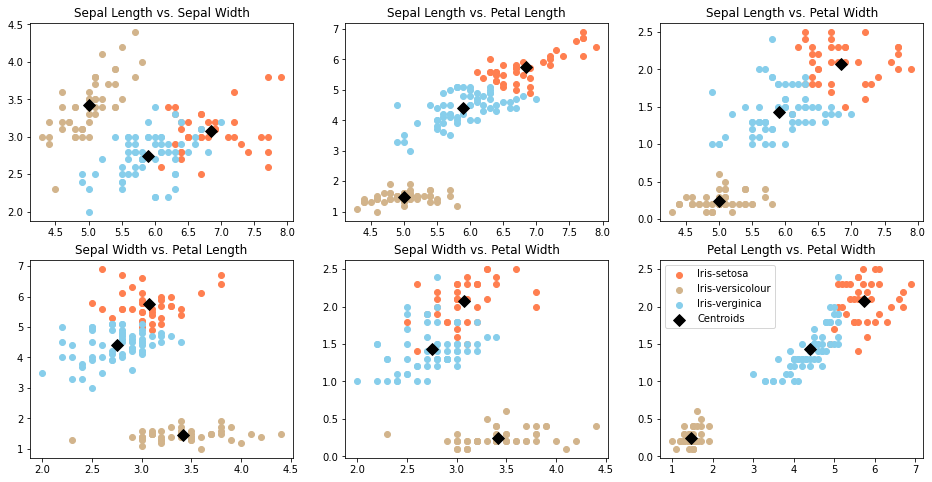

In [15]:
fig, axs = plt.subplots(2, 3, figsize = (16, 8))

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x_points)

m = 0
n = 0
for i in range(0, 4):
    for j in range(i+1, 4):
        if m < 3:
            axs[0, m].scatter(x_points[y_kmeans == 0, i],x_points[y_kmeans == 0, j], c = 'coral', label = 'Iris-setosa')
            axs[0, m].scatter(x_points[y_kmeans == 1, i], x_points[y_kmeans == 1, j], c = 'tan', label = 'Iris-versicolour')
            axs[0, m].scatter(x_points[y_kmeans == 2, i], x_points[y_kmeans == 2, j], c = 'skyblue', label = 'Iris-verginica')
            axs[0, m].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 70, c = 'black', label = 'Centroids', marker = "D")
            m = m + 1
        elif n < 3:
            axs[1, n].scatter(x_points[y_kmeans == 0, i],x_points[y_kmeans == 0, j], c = 'coral', label = 'Iris-setosa')
            axs[1, n].scatter(x_points[y_kmeans == 1, i], x_points[y_kmeans == 1, j], c = 'tan', label = 'Iris-versicolour')
            axs[1, n].scatter(x_points[y_kmeans == 2, i], x_points[y_kmeans == 2, j], c = 'skyblue', label = 'Iris-verginica')
            axs[1, n].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 70, c = 'black', label = 'Centroids', marker = "D")
            n = n + 1
plt.legend()
axs[0, 0].set_title('Sepal Length vs. Sepal Width')
axs[0, 1].set_title('Sepal Length vs. Petal Length')
axs[0, 2].set_title('Sepal Length vs. Petal Width')
axs[1, 0].set_title('Sepal Width vs. Petal Length')
axs[1, 1].set_title('Sepal Width vs. Petal Width')
axs[1, 2].set_title('Petal Length vs. Petal Width')



We can also validate the optimal number of clusters by using the silhouette method as well!

In [11]:
x_values = iris.iloc[:,[1,2,3,4]]
scores = []

for i in range(1,7):
    kmean = KMeans(n_clusters=k)
    kmean.fit(x_values)
    label = kmean.predict(x_values)
    scores.append(silhouette_score(x_values, label))

(np.array(scores)*100).round(2)

array([31.6 , 32.89, 32.21, 29.98, 30.72, 30.86])

The scores aren't that great however... This can be explained graphically from. There arent any clear clusterpoints of data, thus a low score across the board. This method would be better if we had clear defined clusters, but for a dataset like this, the elbow method is preferred.